# Retention of Credit card customers

In [133]:
#importing libraries
import sys
import os
import warnings
import webbrowser
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import GridSearchCV

In [134]:
#reading data
df = pd.read_csv('Customer Retention.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [135]:
df.shape

(10127, 23)

In [136]:
#Dropping columns not required by the model
df.drop(labels = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis = 1, inplace = True)

In [137]:
df.shape

(10127, 21)

In [138]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [139]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
html_template = (corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2)
 .to_html())

In [140]:
# to open/create a new html file in the write mode
f = open('temp_file.html', 'w')

# writing the code into the file
f.write(html_template)

# close the file
f.close()

# 1st method how to open html files in chrome using
filename = 'file:///'+os.getcwd()+'/' + 'temp_file.html'
webbrowser.open_new_tab(filename)

True

## Visualizing data

In [141]:
import altair as alt

alt.Chart(df['Attrition_Flag'].value_counts().reset_index()).mark_bar().encode(
    x = alt.X('index', axis=alt.Axis(labelAngle=-0, title=None)),
    y=alt.Y('Attrition_Flag'),
    color = alt.Color('Attrition_Flag:N', legend=None),
).properties(
    width=400,
    height=300
)

alt.Chart(...)

<AxesSubplot: >

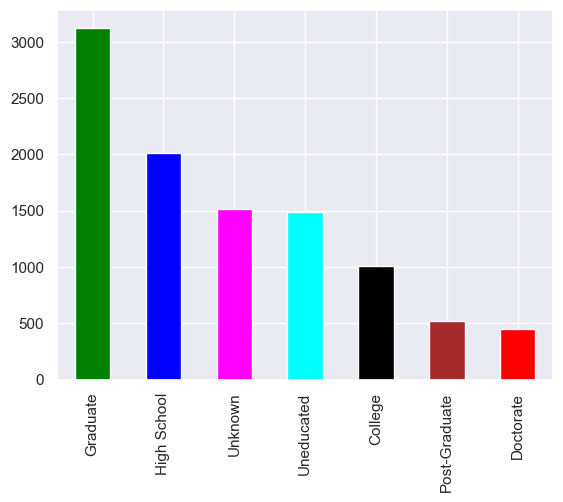

In [142]:
df['Education_Level'].value_counts().plot.bar(color = ['green','blue','magenta','cyan','black','brown','red'])

<AxesSubplot: ylabel='Gender'>

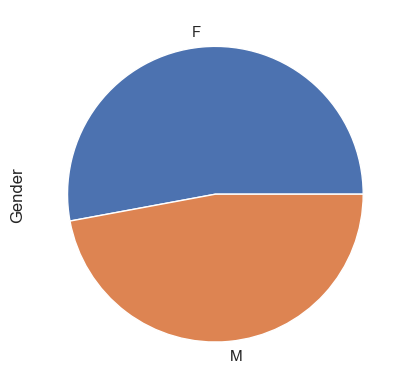

In [143]:
df['Gender'].value_counts().plot.pie()

In [144]:
ins, att = df.shape
ins


10127

In [145]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [146]:
#calculating correlation matrix
df_corr = df.corr()
df_corr

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [147]:
df1= df.rename(columns={'CLIENTNUM':'1', 'Attrition_Flag':'2', 'Customer_Age':'3', 'Gender':'4',
       'Dependent_count':'5', 'Education_Level':'6', 'Marital_Status':'7',
       'Income_Category':'8', 'Card_Category':'9', 'Months_on_book':'10',
       'Total_Relationship_Count':'11', 'Months_Inactive_12_mon':'12',
       'Contacts_Count_12_mon':'13', 'Credit_Limit':'14', 'Total_Revolving_Bal':'15',
       'Avg_Open_To_Buy':'16', 'Total_Amt_Chng_Q4_Q1':'17', 'Total_Trans_Amt':'18',
       'Total_Trans_Ct':'19', 'Total_Ct_Chng_Q4_Q1':'20', 'Avg_Utilization_Ratio':'21'})
df1.columns


Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21'],
      dtype='object')

In [148]:
df1_corr = df1.corr()
df1.corr()

,1,3,5,10,11,12,13,14,15,16,17,18,19,20,21
1,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
3,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
5,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
10,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
11,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
12,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
13,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
14,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
15,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
16,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [149]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<AxesSubplot: >

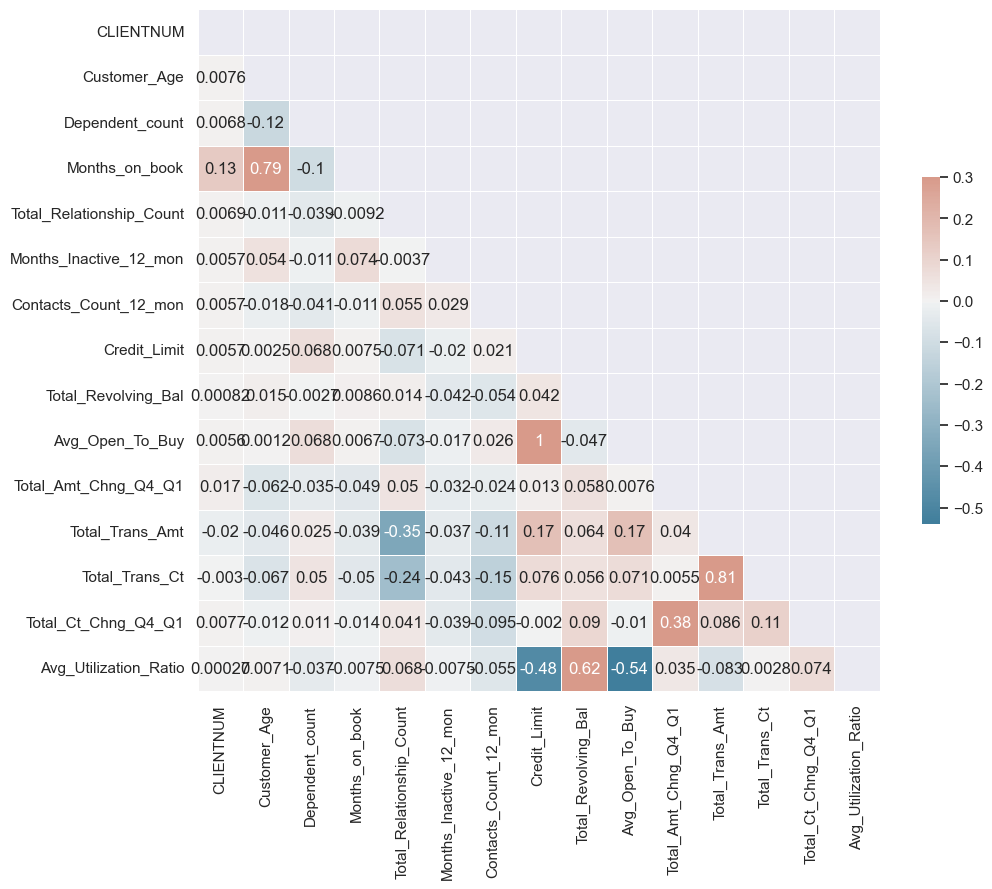

In [150]:
#plotting heatmap for correlation matrix
df_corr = df.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [151]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [152]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


<AxesSubplot: xlabel='Customer_Age', ylabel='Credit_Limit'>

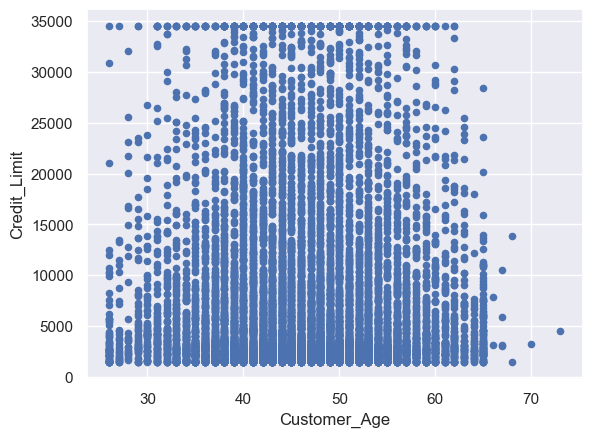

In [153]:
df.plot.scatter('Customer_Age', 'Credit_Limit')

In [154]:
df1 = pd.DataFrame(columns=['Income_Category','Attrition_Flag'], data = df)

In [155]:
df1.head()

,Income_Category,Attrition_Flag
0,$60K - $80K,Existing Customer
1,Less than $40K,Existing Customer
2,$80K - $120K,Existing Customer
3,Less than $40K,Existing Customer
4,$60K - $80K,Existing Customer


In [156]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

<AxesSubplot: ylabel='Frequency'>

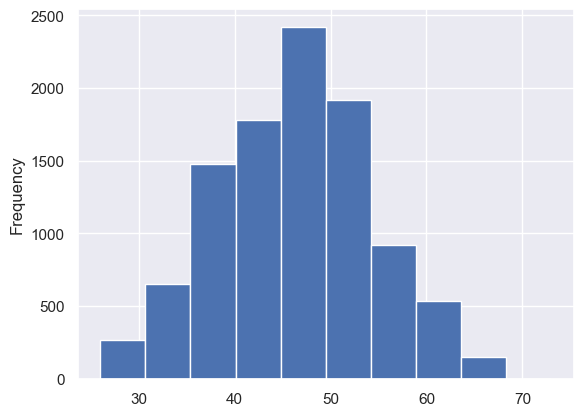

In [157]:
df['Customer_Age'].plot(kind='hist')

In [158]:
pd.cut(df['Customer_Age'],bins = 4).value_counts()

(37.75, 49.5]      5197
(49.5, 61.25]      3218
(25.953, 37.75]    1400
(61.25, 73.0]       312
Name: Customer_Age, dtype: int64

<AxesSubplot: >

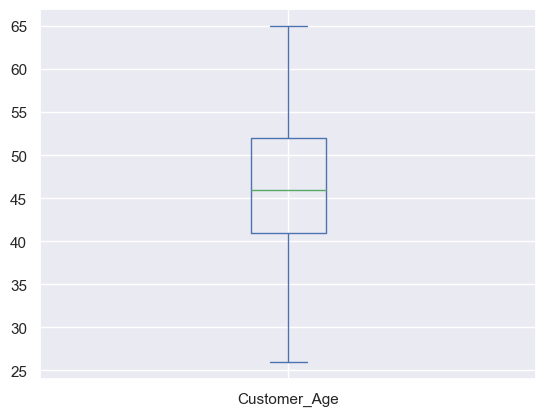

In [159]:
df.loc[df['Customer_Age'] > 65, 'Customer_Age'] = np.mean(df['Customer_Age'])
df['Customer_Age'].plot.box()

In [160]:
bins = [0,35,45,55,70]
cut_labels = ['0_35', '35_45', '45_55', '55_70']
df['Customer_Age'] = pd.cut(df['Customer_Age'], bins=bins, labels=cut_labels)

In [161]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,35_45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,35_45,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<AxesSubplot: >

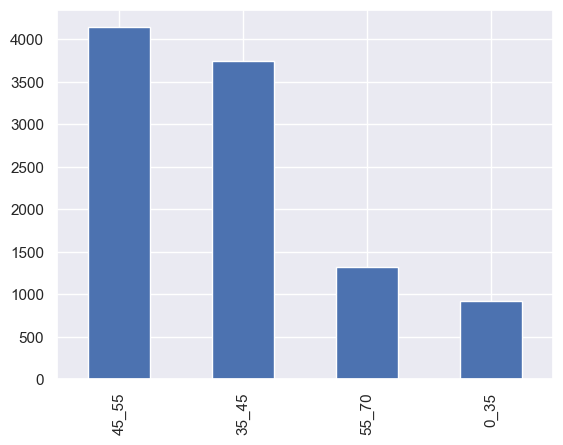

In [162]:
df['Customer_Age'].value_counts().plot(kind = 'bar')

<AxesSubplot: ylabel='Frequency'>

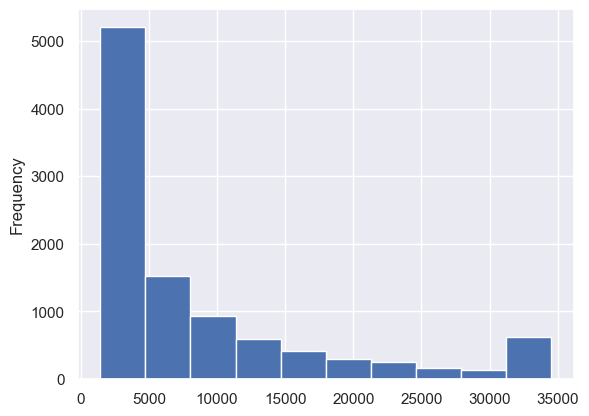

In [163]:
df['Credit_Limit'].plot(kind = 'hist')

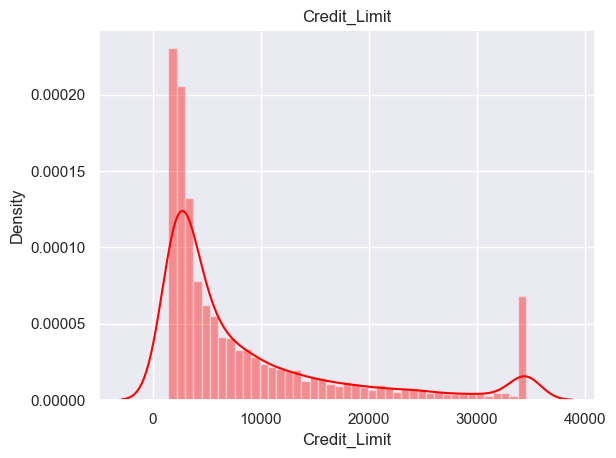

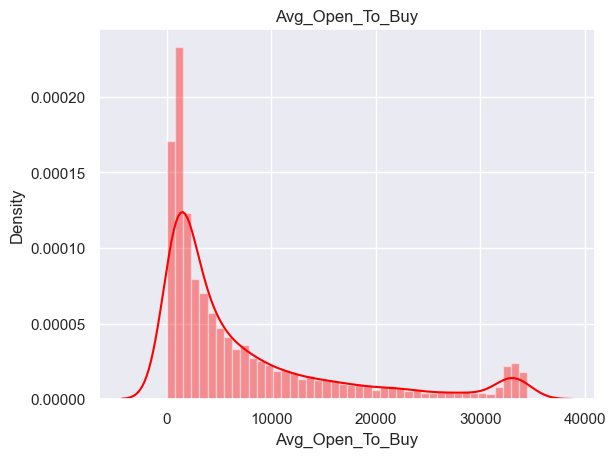

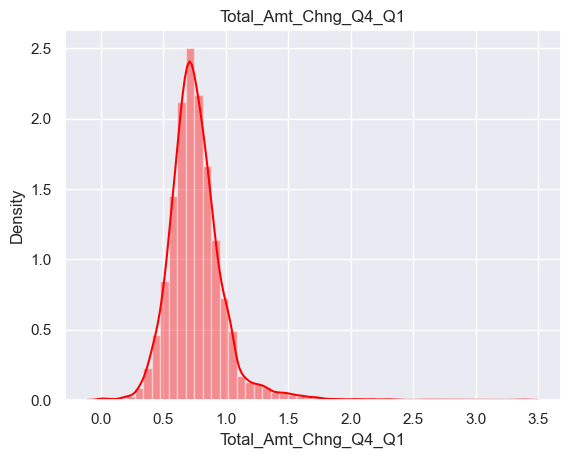

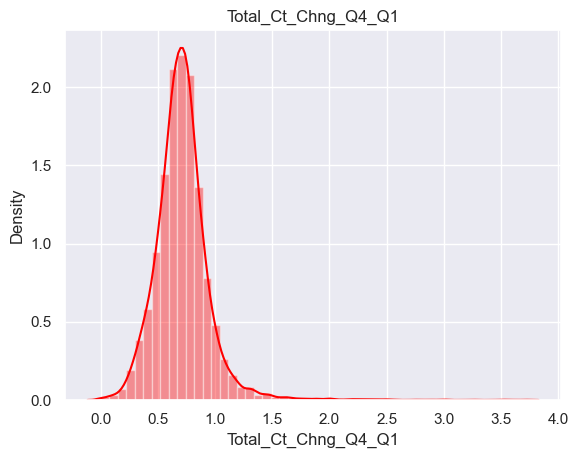

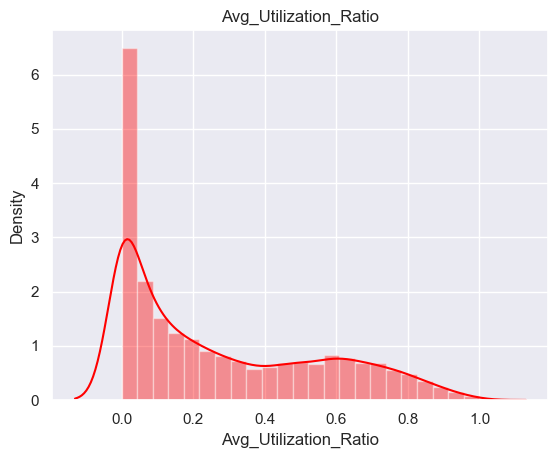

In [164]:
cont_attributes = df.select_dtypes(['float64']).columns.to_list()

for cont_attribute in cont_attributes: 
    plt.figure()
    plt.title(cont_attribute)
    ax = sns.distplot(df[cont_attribute], color = 'red')

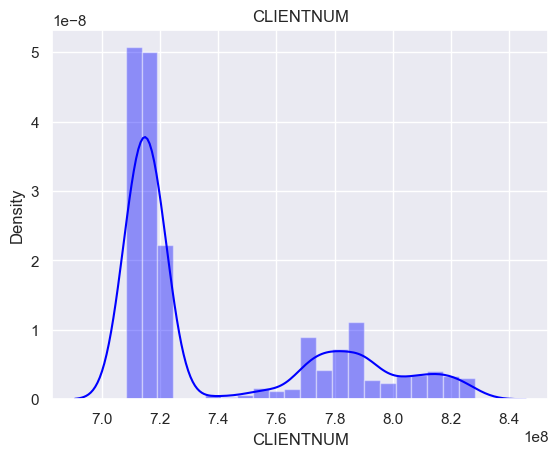

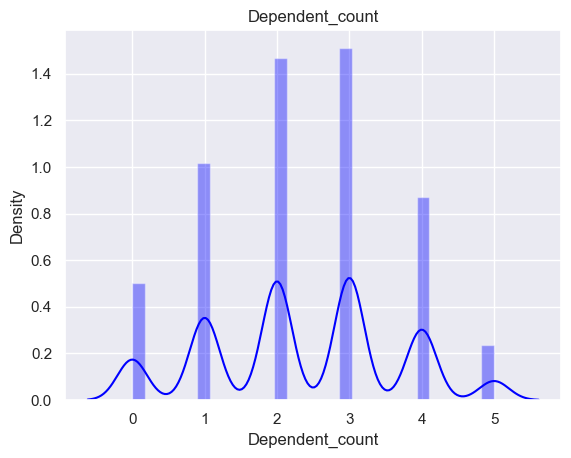

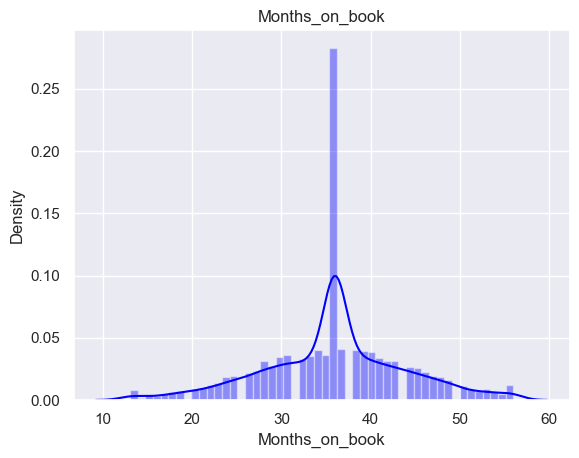

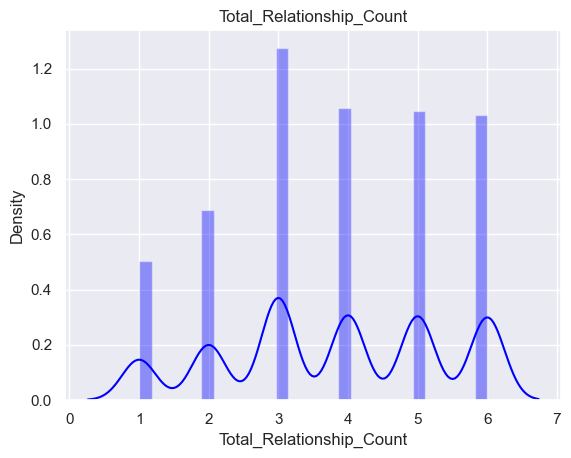

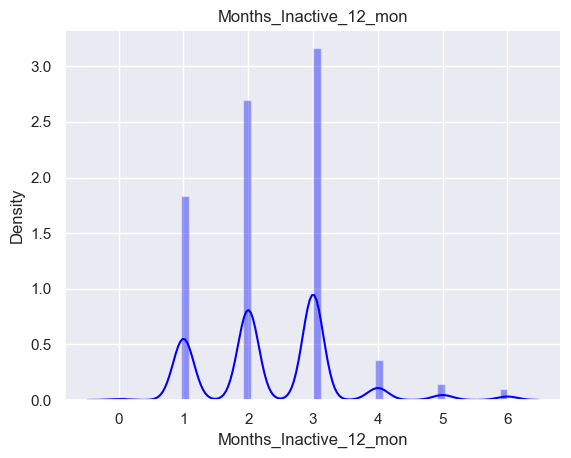

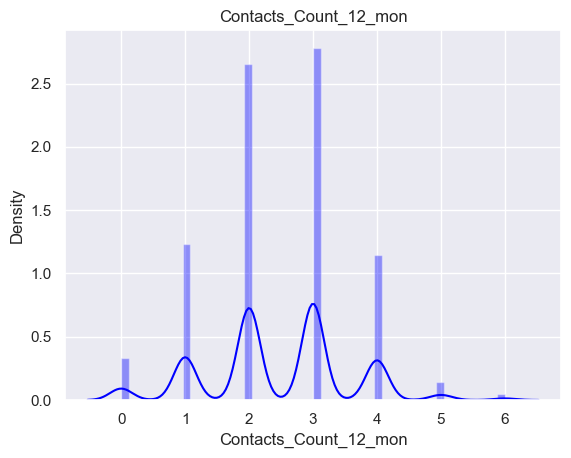

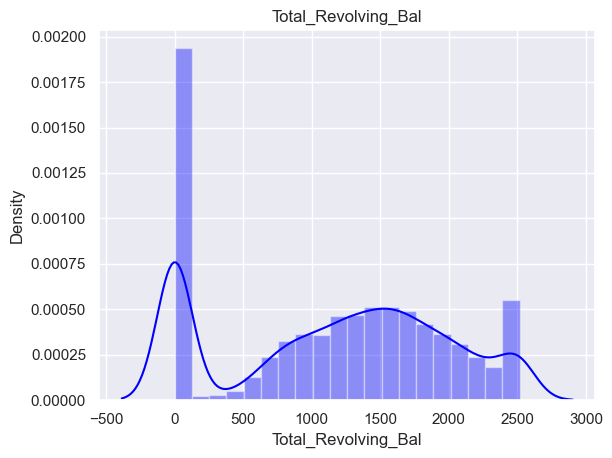

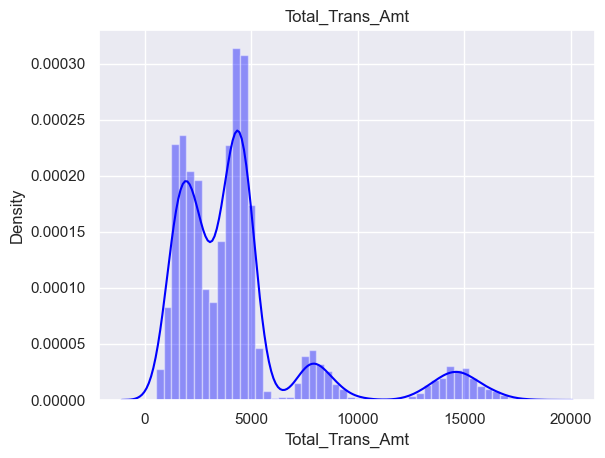

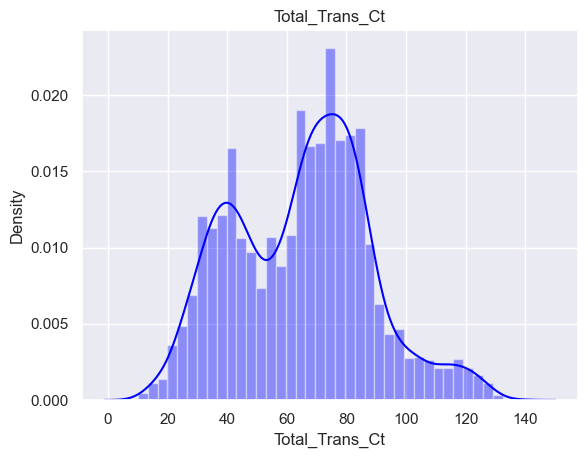

In [165]:
cont_attributes = df.select_dtypes(['int64']).columns.to_list()

for cont_attribute in cont_attributes: 
    plt.figure()
    plt.title(cont_attribute)
    ax = sns.distplot(df[cont_attribute], color = 'blue')

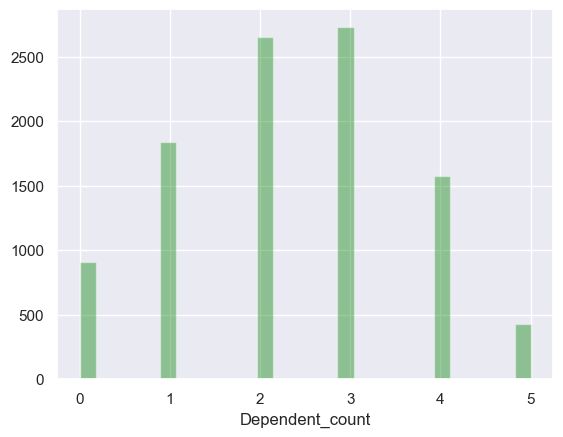

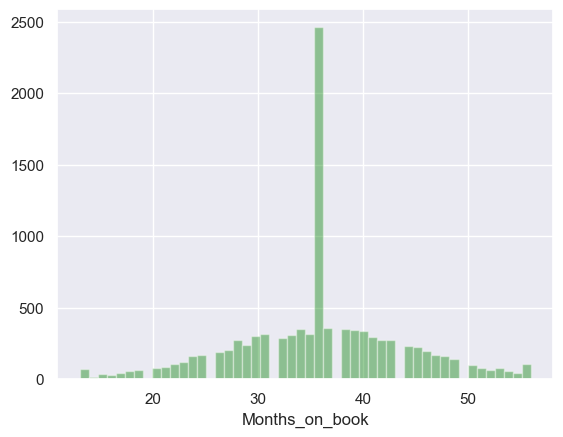

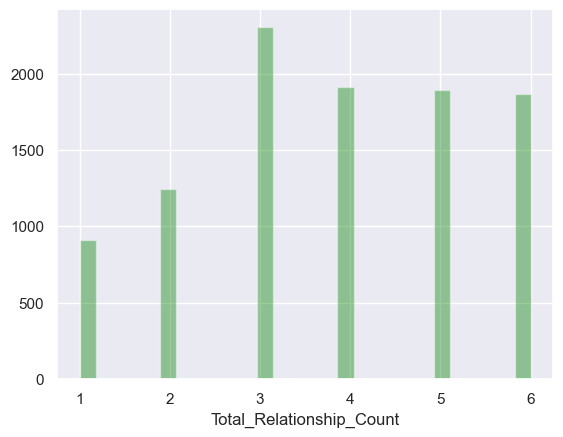

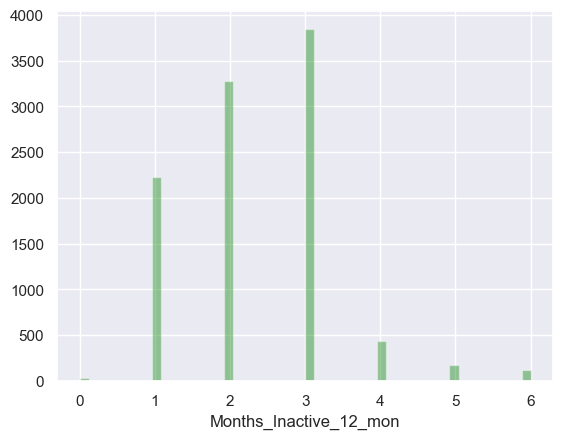

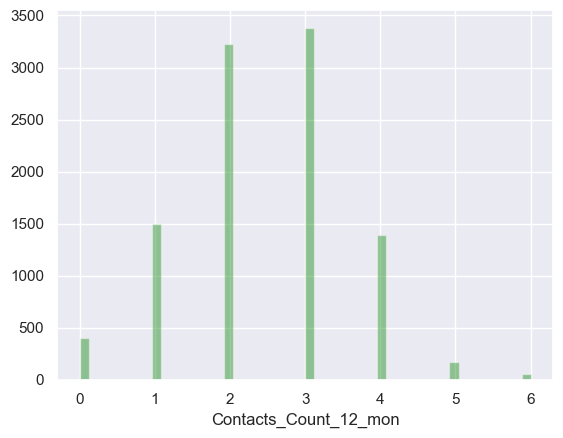

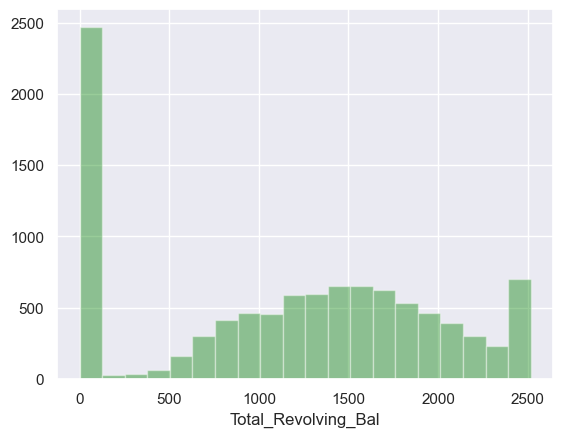

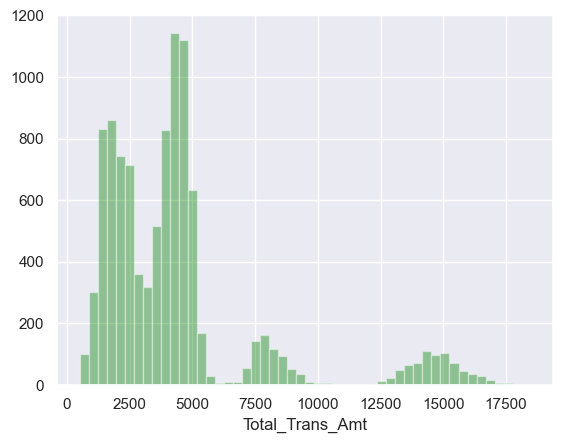

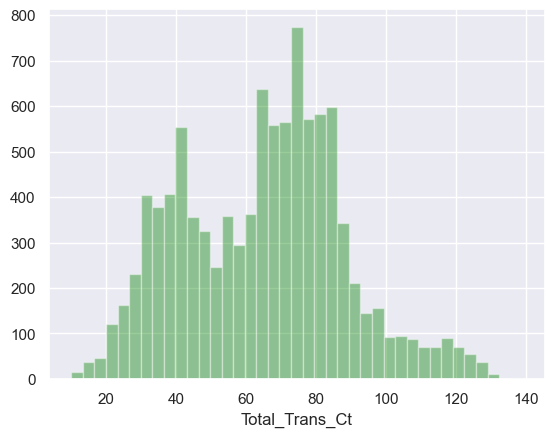

In [166]:
discrete_attributes = df.select_dtypes(['int64']).columns.to_list()

for disc_attribute in discrete_attributes:
    if not(disc_attribute == 'CLIENTNUM'):
        plt.figure()
        ax = sns.distplot(df[disc_attribute],kde = False, color = 'green')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  object  
 2   Customer_Age              10127 non-null  category
 3   Gender                    10127 non-null  object  
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  object  
 6   Marital_Status            10127 non-null  object  
 7   Income_Category           10127 non-null  object  
 8   Card_Category             10127 non-null  object  
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [168]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [169]:
#labels = {'Existing Customer':'0','Attrited Customer':'1'}
#df['Attrition_Flag'] = df['Attrition_Flag'].map(labels)
#df.head()

<AxesSubplot: >

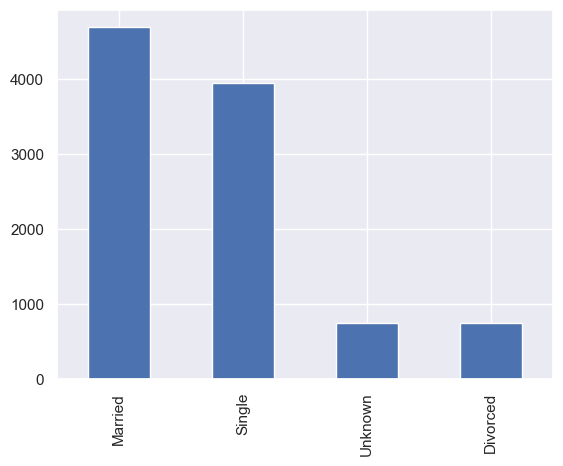

In [170]:
df['Marital_Status'].value_counts().plot(kind = 'bar')

In [171]:
#dropping duplicate records
df.drop_duplicates().head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,35_45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,35_45,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [172]:
df['Marital_Status'].replace(to_replace = 'Unknown', value = 'Single', inplace = True)


In [173]:
df['Marital_Status'].value_counts()

Single      4692
Married     4687
Divorced     748
Name: Marital_Status, dtype: int64

In [174]:
cat_types = ['bool','object','category']
data = df.copy()
data[data.select_dtypes(cat_types).columns] = data.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  category
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [176]:
labels = {'Existing Customer':'0','Attrited Customer':'1'}
data['Attrition_Flag'] = data['Attrition_Flag'].map(labels)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,35_45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,35_45,F,4,High School,Single,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [177]:
data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [178]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,35_45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,35_45,F,4,High School,Single,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,45_55,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,35_45,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,35_45,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,0_35,M,2,Graduate,Single,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [179]:
#Output and input variables
Y = data['Attrition_Flag']
X = data.drop('Attrition_Flag',axis = 1)

In [180]:
X

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,35_45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,45_55,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,45_55,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,35_45,F,4,High School,Single,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,35_45,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,45_55,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,35_45,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,35_45,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,0_35,M,2,Graduate,Single,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [181]:
X.shape,Y.shape

((10127, 20), (10127,))

In [182]:
for col in X.select_dtypes('category').columns.to_list():
    print(col + ': '+ str(X[col].cat.categories.to_list()))

Customer_Age: ['0_35', '35_45', '45_55', '55_70']
Gender: ['F', 'M']
Education_Level: ['College', 'Doctorate', 'Graduate', 'High School', 'Post-Graduate', 'Uneducated', 'Unknown']
Marital_Status: ['Divorced', 'Married', 'Single']
Income_Category: ['$120K +', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', 'Unknown']
Card_Category: ['Blue', 'Gold', 'Platinum', 'Silver']


In [183]:
col_list = X.select_dtypes('category').columns.to_list()
col_list

['Customer_Age',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

## Preparing Data

### One-hot encoding

In [184]:
def encode_fun(dataframe,attributes):
    dummies = pd.get_dummies(dataframe[attributes])
    result = pd.concat([dataframe,dummies],axis =1)
    result = result.drop([attributes], axis=1)
    return(result)

In [185]:
col_list = X.select_dtypes('category').columns.to_list()
for col in col_list:
    X = encode_fun(X,col)

In [186]:
X.head()

,CLIENTNUM,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown,Blue,Gold,Platinum,Silver
0,768805383,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,818770008,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,713982108,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,769911858,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,709106358,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0


In [187]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  0_35  

### Performing Stratified K-Fold split

In [188]:
def kfold_split(X,Y):
    skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for train_index, test_index in skfold.split(X,Y):
        skf_X_train, skf_X_test = X.iloc[train_index], X.iloc[test_index]
        skf_Y_train, skf_Y_test = Y.iloc[train_index], Y.iloc[test_index]
        skf_X_train, skf_X_test, skf_Y_train, skf_Y_test = skf_X_train.values, skf_X_test.values, skf_Y_train.values, skf_Y_test.values
        return skf_X_train, skf_X_test, skf_Y_train, skf_Y_test

In [189]:
X_train, X_test, Y_train, Y_test = kfold_split(X,Y)

### Cross-validation function

In [190]:
from sklearn.model_selection import KFold
def cross_val_score_func(model,X,y):
    cv = KFold(n_splits=10, random_state=1, shuffle=True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

### KNN

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
KNN_Model = KNeighborsClassifier(n_neighbors=3)
KNN_Model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [193]:
KNN_Model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [194]:
KNN_Model.kneighbors(X=None, return_distance=True)

(array([[17459.68796972, 44065.5555281 , 73856.54852483],
        [ 7396.93341865,  9055.32152935, 40928.39561967],
        [ 4291.99068033,  6860.7358206 ,  7265.18932995],
        ...,
        [ 9122.15763951,  9907.60192983, 11017.23449873],
        [ 8534.77029568,  8684.69550416,  8728.21264636],
        [10046.73877435, 12511.89514023, 12919.60618595]]),
 array([[5552, 7746, 8132],
        [7882, 5868, 6994],
        [7332, 4715, 3774],
        ...,
        [6271, 6184, 6661],
        [3546,  274, 7163],
        [3136, 6115,  874]], dtype=int64))

In [195]:
KNN_Model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [196]:
KNN_Model.score(X_test,Y_test)

0.7946692991115498

In [197]:
test_pred = KNN_Model.predict(X_test)

In [198]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay

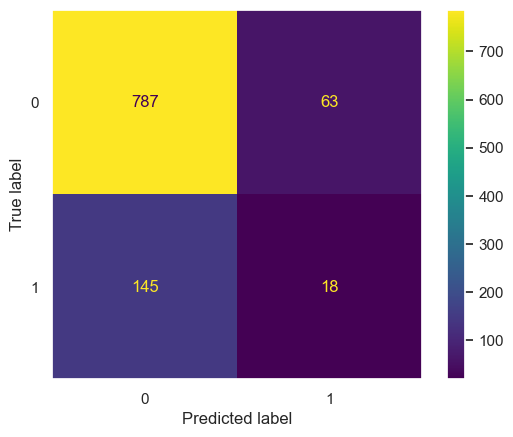

In [199]:
test = confusion_matrix(Y_test,test_pred,labels=KNN_Model.classes_)
ConfusionMatrixDisplay(confusion_matrix=test,display_labels=KNN_Model.classes_).plot()
plt.grid(False)

In [200]:
print("Classification report: ")
rep = classification_report(Y_test,test_pred)
print(rep)

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       850
           1       0.22      0.11      0.15       163

    accuracy                           0.79      1013
   macro avg       0.53      0.52      0.52      1013
weighted avg       0.74      0.79      0.76      1013



### To check the Cluster size is correct or not

In [201]:
test = []
for i in range(1,30):
    test_elbow = KNeighborsClassifier(n_neighbors=i)
    test_elbow.fit(X_train,Y_train)
    pred_i = test_elbow.predict(X_test)
    test.append(np.mean(pred_i != Y_test))

In [202]:
import pandas as pd  
dframe = pd.DataFrame(test) 
dframe['index'] = dframe.index
dframe.columns =['test', 'index']
import altair as alt
alt.Chart(dframe).mark_line().encode(
    x='index',
    y='test'
).properties(
    title="Elbow Curve",
    width=400,
    height=300,
)

alt.Chart(...)

In [203]:
KNN_Model1 = KNeighborsClassifier(n_neighbors=2)
KNN_Model1.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=2)

In [204]:
KNN_Model1.score(X_test,Y_test)

0.8262586377097729

In [205]:
test_pred1 = KNN_Model1.predict(X_test)

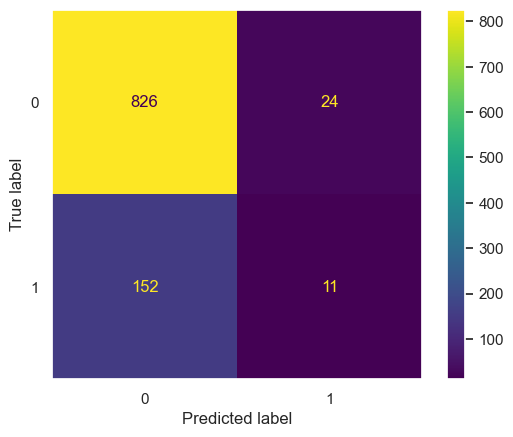

In [206]:
test1 = confusion_matrix(Y_test,test_pred1,labels=KNN_Model1.classes_)
ConfusionMatrixDisplay(confusion_matrix=test1,display_labels=KNN_Model1.classes_).plot()
plt.grid(False)

In [207]:
print("Classification report: ")
rep = classification_report(Y_test,test_pred1)
print(rep)

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       850
           1       0.31      0.07      0.11       163

    accuracy                           0.83      1013
   macro avg       0.58      0.52      0.51      1013
weighted avg       0.76      0.83      0.78      1013



In [208]:
temp_classif_report = classification_report(Y_test,test_pred1, output_dict=True)

knn_f1score = {'0':round(temp_classif_report["0"]["f1-score"], 2),'1':round(temp_classif_report["1"]["f1-score"], 2)}
knn_prec = {'0':round(temp_classif_report["0"]["precision"], 2),'1':round(temp_classif_report["1"]["precision"], 2)}

In [209]:
print(temp_classif_report)

{'0': {'precision': 0.8445807770961146, 'recall': 0.971764705882353, 'f1-score': 0.9037199124726477, 'support': 850}, '1': {'precision': 0.3142857142857143, 'recall': 0.06748466257668712, 'f1-score': 0.11111111111111112, 'support': 163}, 'accuracy': 0.8262586377097729, 'macro avg': {'precision': 0.5794332456909144, 'recall': 0.51962468422952, 'f1-score': 0.5074155117918794, 'support': 1013}, 'weighted avg': {'precision': 0.7592519565254381, 'recall': 0.8262586377097729, 'f1-score': 0.7761826621054903, 'support': 1013}}


In [210]:
knn_cval = cross_val_score(KNN_Model1,X_test,Y_test,scoring='accuracy')
knn_cross_val = knn_cval.mean()
knn_cross_val

0.8242988830902794

In [239]:
KNN_score =knn_cross_val

In [211]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1,100, 1],
    'p': [1,2],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'chebyshev']
}
# Creating a based model
base_model = KNeighborsClassifier()
base_model.fit(X_train, Y_train)
#base_accuracy = evaluate(base_model, X_test, Y_test)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=base_model,
    param_grid=param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)
grid_search.best_params_
grid_search.best_estimator_
grid_search.best_score_

KeyboardInterrupt: 

### Decision Tree

In [ ]:
model2 = DecisionTreeClassifier(random_state=0)

In [ ]:
model2.fit(X_train,Y_train)
model2.score(X_test,Y_test)

In [242]:
DT_score = model2.score(X_test,Y_test)

In [ ]:
model2.predict(X_test)

In [ ]:
pred_2=model2.predict(X_test)
pred_2[:10], model2.score(X_test, Y_test)

In [ ]:
train_accuracy,test_accuracy = [], []
for d in range(1,10):
    model2_test = DecisionTreeClassifier(max_depth=d, random_state=0)
    model2_test.fit(X_train,Y_train)
    train_accuracy.append(model2_test.score(X_train,Y_train))
    test_accuracy.append(model2_test.score(X_test,Y_test))

In [ ]:
test2_res = pd.DataFrame({'max_depth':range(1,10),'train_accuracy':train_accuracy,'test_accuracy':test_accuracy})
test2_res

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(test2_res['max_depth'],test2_res['train_accuracy'],marker = 'o',color = 'green')
plt.plot(test2_res['max_depth'],test2_res['test_accuracy'],marker = 'o',color = 'red')
plt.xlabel('max_depth')
plt.ylabel('score/accuracy')
plt.legend(['Train_accuracy','Test_accuracy'])

# Hyper-parameter tuning

In [ ]:
training_data, testing_data = [], []
for rs in range(0,100):
    mlmodel = DecisionTreeClassifier(max_depth=5, random_state=rs)
    mlmodel.fit(X_train,Y_train)
    training_data.append(mlmodel.score(X_train,Y_train))
    testing_data.append(mlmodel.score(X_test,Y_test))

In [ ]:
test_data_check = pd.DataFrame({'random_state':range(0,100),'traindata_accuracy_rate':training_data,'testdata_accuracy_rate':testing_data})
test_data_check.head(10)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(test_data_check['random_state'],test_data_check['traindata_accuracy_rate'],marker = 's',color = 'blue')
plt.plot(test_data_check['random_state'],test_data_check['testdata_accuracy_rate'],marker = 's',color = 'black')
plt.gca().set(xlabel='random_state',ylabel='score/accuracy')
plt.legend(['Traindata_accuracy_rate','Testdata_accuracy_rate'])

In [ ]:
training_data, testing_data = [], []
for each_node in range(2,30):
    mlmodel = DecisionTreeClassifier(max_depth=5, random_state=0, max_leaf_nodes=each_node)
    mlmodel.fit(X_train,Y_train)
    training_data.append(mlmodel.score(X_train,Y_train))
    testing_data.append(mlmodel.score(X_test,Y_test))

In [ ]:
test_data_check = pd.DataFrame({'maxi_nodes':range(2,30),'traindata_accuracy_rate':training_data,'testdata_accuracy_rate':testing_data})
test_data_check.head(10)

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(test_data_check['maxi_nodes'],test_data_check['traindata_accuracy_rate'],marker = 's',color = 'blue')
plt.plot(test_data_check['maxi_nodes'],test_data_check['testdata_accuracy_rate'],marker = 's',color = 'black')
plt.gca().set(xlabel='maxi_nodes',ylabel='score/accuracy')
plt.legend(['Traindata_accuracy_rate','Testdata_accuracy_rate'])

In [ ]:
desc_tree = DecisionTreeClassifier(max_depth=5,random_state=0,max_leaf_nodes=25)
desc_tree.fit(X_train,Y_train)
desc_tree_score = desc_tree.score(X_test,Y_test)
desc_tree_score

In [ ]:
def crossvalues(X, Y, depths, cv=5, scoring='accuracy'):
    cvscores_list,cvscores_std,cvscores_mean,accuracy_scores = [],[],[],[]
    for each_depth in depths:
        tree = DecisionTreeClassifier(max_depth=each_depth)
        cvscores = cross_val_score(tree, X, Y, cv=cv, scoring=scoring)
        cvscores_list.append(cvscores)
        cvscores_std.append(cvscores.std())
        cvscores_mean.append(cvscores.mean())
        accuracy_scores.append(tree.fit(X, Y).score(X, Y))
    cvscores_mean,cvscores_std = np.array(cvscores_mean),np.array(cvscores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cvscores_mean, cvscores_std, accuracy_scores

In [ ]:
datapoints = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = crossvalues(X_train, Y_train, datapoints)

In [ ]:
fig, pl = plt.subplots(1,1, figsize=(15,10))
pl.plot(datapoints, sm_cv_scores_mean, '-s', label='mean cross-validation accuracy', alpha=0.8)
pl.fill_between(datapoints, sm_cv_scores_mean-2*sm_cv_scores_std, sm_cv_scores_mean+2*sm_cv_scores_std, alpha=0.2)
pl.plot(datapoints, sm_accuracy_scores, '-s', label='train accuracy', alpha=0.8)
pl.set_title('Accuracy per decision tree depth on training data', fontsize=16)
pl.set_xlabel('Tree depth', fontsize=14)
pl.set_ylabel('Accuracy', fontsize=14)
pl.set_ylim()
pl.set_xticks(datapoints)
pl.legend()

In [ ]:
decision_tree = DecisionTreeClassifier(max_depth=5, random_state=0, max_leaf_nodes=25)
decision_tree.fit(X_train,Y_train)
pred_ytest = decision_tree.predict(X_test)
pred_ytrain = decision_tree.predict(X_train)

In [ ]:
from sklearn.metrics import  classification_report,confusion_matrix
train = confusion_matrix(Y_train, pred_ytrain,labels=decision_tree.classes_)
test = confusion_matrix(Y_test, pred_ytest,labels=decision_tree.classes_)
print("train array:\n",train)
print("test array:\n",test)

In [ ]:
cm_test = confusion_matrix(Y_test, pred_ytest,labels=decision_tree.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=decision_tree.classes_).plot()
plt.grid(False)

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), {'max_depth':range(0,30),'max_leaf_nodes':range(0,30),'min_samples_split': [2, 3, 4]}, verbose=1, cv=3)
grid.fit(X_train,Y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_score_

In [ ]:
print("Classification report: ")
rep = classification_report(Y_test,pred_ytest)
print(rep)
print('Accuracy: ')
print(decision_tree.score(X_test,Y_test))

In [ ]:
#### Final score of Decision Tree is 93.83% on the test data

### SVM

In [ ]:
from sklearn import svm

In [ ]:
model3 = svm.SVC(C = 1.0,tol=0.001, cache_size=200, class_weight=None, verbose=False, kernel='rbf', gamma ='scale', random_state=None)

In [ ]:
model3.fit(X_train,Y_train)

In [ ]:
svmtrain_pred = model3.predict(X_train)
svmtest_pred = model3.predict(X_test)

In [ ]:
SVM_score = model3.score(X_test,Y_test)

In [ ]:
svm_cm_train = confusion_matrix(Y_train, svmtrain_pred,labels=model3.classes_)
svm_cm_test = confusion_matrix(Y_test, svmtest_pred,labels=model3.classes_)

In [ ]:
showplot = ConfusionMatrixDisplay(confusion_matrix=svm_cm_test,display_labels=model3.classes_)

In [ ]:
showplot.plot()

In [ ]:
svm_report = classification_report(Y_test,svmtest_pred)
print("Report", svm_report)

In [ ]:
svm_f1score = {'0':0.91,'1':0.00}
svm_prec = {'0':0.84,'1':0.00}

In [ ]:
svm_cal = cross_val_score(model3,X_test,Y_test,scoring='accuracy')
svm_cross_validation = svm_cal.mean()
svm_cross_validation

## Performing GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
 params_grid = { 'C': [0.1, 1],  
   'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']  }

In [ ]:
grid = GridSearchCV(svm.SVC(), params_grid, refit = True, verbose = 3, return_train_score=False)

In [ ]:
grid.fit(X_train,Y_train)

In [ ]:
print(grid.best_params_)

In [ ]:
print(grid.best_estimator_)

## Random Forest

In [212]:
from sklearn.ensemble import RandomForestClassifier
rand_classif = RandomForestClassifier()

In [213]:
rand_classif.fit(X_train, Y_train)
rand_classif.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [214]:
rand_classif.score(X_train, Y_train)

0.999890278692122

In [215]:
rand_classif_score = rand_classif.score(X_test, Y_test)
rand_classif_score

0.9526159921026653

In [237]:
RFC_score = rand_classif_score

In [216]:
rand_classif.feature_importances_

array([0.02869608, 0.01332523, 0.02624498, 0.0640358 , 0.02596432,
       0.02773715, 0.036138  , 0.10217077, 0.03353184, 0.06182724,
       0.17851281, 0.13896849, 0.11387041, 0.05943493, 0.00691972,
       0.004452  , 0.00491031, 0.0031764 , 0.00697362, 0.00563896,
       0.00240336, 0.0022867 , 0.00452528, 0.00363699, 0.00250917,
       0.0033295 , 0.00341243, 0.0019942 , 0.00544708, 0.00493671,
       0.00229102, 0.00329969, 0.00295669, 0.00317038, 0.00358015,
       0.00258129, 0.00220611, 0.00126932, 0.00021617, 0.0014187 ])

In [217]:
imp_feat_df = pd.Series(rand_classif.feature_importances_, index=X.columns)

In [218]:
%%time
importance = rand_classif.feature_importances_
standard_deviation = np.std([tree.feature_importances_ for tree in rand_classif.estimators_], axis=0)

CPU times: total: 0 ns
Wall time: 36.8 ms


In [220]:
alt.Chart(imp_feat_df.nlargest(10).sort_values().reset_index().rename(columns={0: 'importance'}),
          title="Important Features").mark_bar().encode(
    x=alt.X('importance'),
    y=alt.Y('index', axis=alt.Axis(labelAngle=-0, title=None), sort='-x'),
).properties(
    width=600,
    height=300
)

alt.Chart(...)

In [221]:
randf_y_test_pred = rand_classif.predict(X_test)
randf_y_train_pred = rand_classif.predict(X_train)

In [222]:
randf_cm_train = confusion_matrix(Y_train, randf_y_train_pred, labels=rand_classif.classes_)
randf_cm_test = confusion_matrix(Y_test, randf_y_test_pred, labels=rand_classif.classes_)

In [223]:
print('Confusion matrix of training set:')
print(randf_cm_train)
print('Confusion matrix of testing set:')
print(randf_cm_test)

Confusion matrix of training set:
[[7650    0]
 [   1 1463]]
Confusion matrix of testing set:
[[837  13]
 [ 35 128]]


Confusion Matrix plot for training set
Confusion Matrix plot for testing set


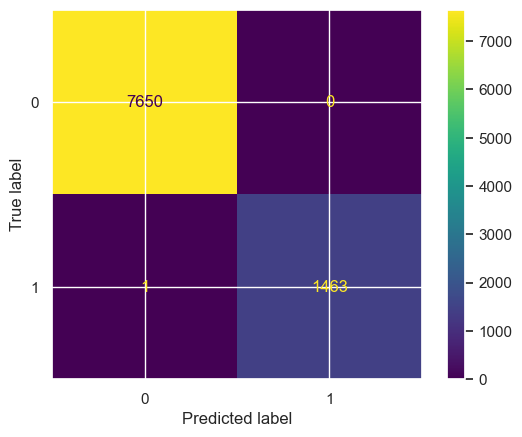

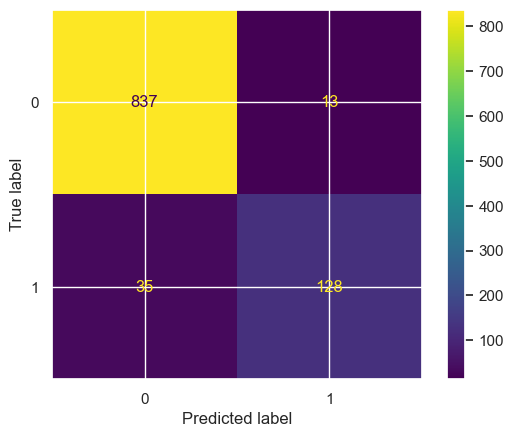

In [224]:
print("Confusion Matrix plot for training set")
plot_confusion_matrix(rand_classif, X_train, Y_train)
print("Confusion Matrix plot for testing set")
plot_confusion_matrix(rand_classif, X_test, Y_test)

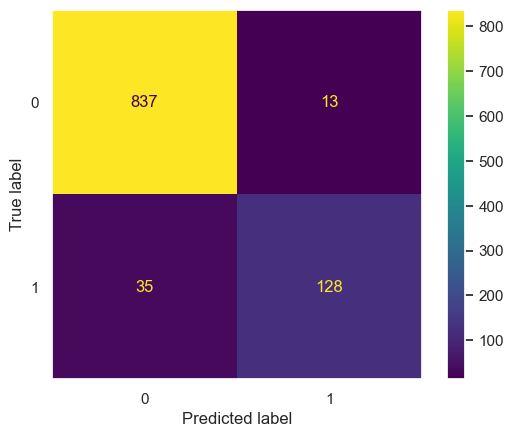

In [225]:
disp = ConfusionMatrixDisplay(confusion_matrix=randf_cm_test, display_labels=rand_classif.classes_)
disp.plot()
plt.grid(False)

In [227]:
rand_classif_report = classification_report(Y_test, randf_y_test_pred)
print("Random Forest Classifier Performance Report:")
print(rand_classif_report)

Random Forest Classifier Performance Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       850
           1       0.91      0.79      0.84       163

    accuracy                           0.95      1013
   macro avg       0.93      0.88      0.91      1013
weighted avg       0.95      0.95      0.95      1013



In [228]:
temp_classif_report = classification_report(Y_test, randf_y_test_pred, output_dict=True)

rfc_f1score = {'0': round(temp_classif_report["0"]["f1-score"], 2), '1': round(temp_classif_report["1"]["f1-score"], 2)}
rfc_prec = {'0': round(temp_classif_report["0"]["precision"], 2), '1': round(temp_classif_report["1"]["precision"], 2)}

In [229]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
print(
    f'Random Forest Classifier Mean Accuracy is {round((cross_val_score(rand_classif, X_test, Y_test, cv=skf, scoring="accuracy").mean()) * 100, 2)}')

Random Forest Classifier Mean Accuracy is 92.2


## Hyper Parameter Tuning for Random Forest

In [230]:
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=3)
CV_rfc.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.882 total time=   4.3s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.951 total time=   4.7s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.958 total time=   2.5s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.965 total time=   2.6s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.844 total time=   2.1s
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=500;, score=0.884 total time=   5.9s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=500;, score=0.958 total time=   6.0s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=500;, score=0.957 total time=   7.5s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=500;, score=0.964 total time=   9.1s
[CV 5/5] END criterion=gini, max_features=auto, n_estimat

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=3)

In [231]:
CV_rfc.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}

In [233]:
rfc1 = RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators=500, criterion='entropy')
rfc1.fit(X_train, Y_train)
pred = rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ", accuracy_score(Y_test, pred))

Accuracy for Random Forest on CV data:  0.9526159921026653


## Model Comparison

In [243]:
model_scores = {"Support_Vector_Machine":SVM_score,
                "Random_Forest_Classifier":RFC_score,
                "k_Nearest_Neighbours":KNN_score,
                "Decision_Tree":DT_score}

In [244]:
keys = model_scores.keys()
values = model_scores.values()

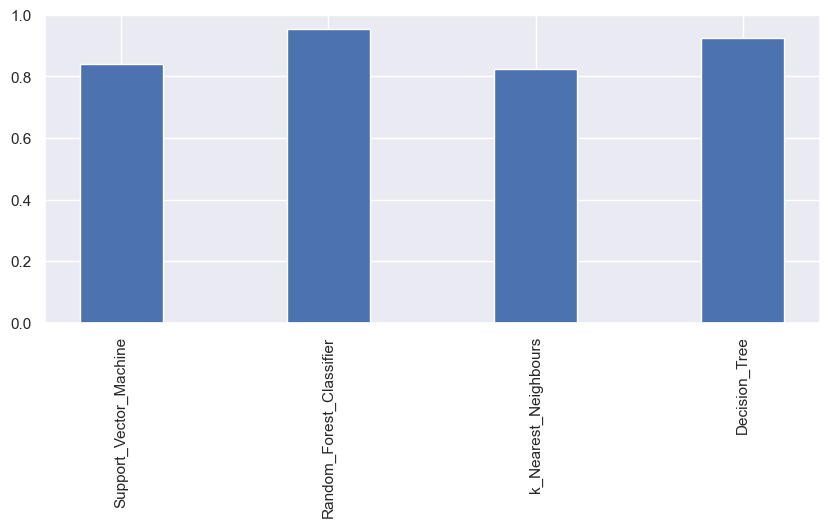

In [245]:
plt.figure(figsize=(10,4))
plt.bar(keys,values,width=0.4)
plt.xticks(rotation=90)
plt.show()

In [246]:
print('Model                 Scores')
for m,s in model_scores.items():
    print('{} {}'.format(m, s))

Model                 Scores
Support_Vector_Machine 0.8390918065153011
Random_Forest_Classifier 0.9526159921026653
k_Nearest_Neighbours 0.8242988830902794
Decision_Tree 0.9259624876604146


In [ ]:
model_cross_val_scores= {"Support_Vector_Machine":svm_cross_val,
                "Random_Forest_Classifier":rfc_cross_val,
                "k_Nearest_Neighbours":knn_cross_val,
                "Decision_Tree":dtree_cross_val}

In [ ]:
keys = model_scores.keys()
values = model_scores.values()

In [ ]:
plt.figure(figsize=(10,4))
plt.bar(keys,values,width=0.4,color = 'brown')
plt.xticks(rotation=0)
plt.show()

In [ ]:
print(svm_f1score,knn_f1score,dtree_f1score,rfc_f1score)

In [ ]:
X = ['SVM_F1_score','KNN_F1_score','DecisionTree_F1_score','RFC_F1_score']
label_0 = [svm_f1score['0'],knn_f1score['0'],dtree_f1score['0'],rfc_f1score['0']]
label_1 = [svm_f1score['1'],knn_f1score['1'],dtree_f1score['1'],rfc_f1score['1']]
n = 4
X_axis = np.arange(n)
width = 0.25
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

figure1 = plt.bar(X_axis, label_0, color = 'b',
        width = width, edgecolor = 'black',
        label='label_0')
figure2 = plt.bar(X_axis + width, label_1, color = 'g',
        width = width, edgecolor = 'black',
        label='label_1')

plt.grid(linestyle='--')
plt.xticks(X_axis + width/2,X)
plt.legend()
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("F1_measures")
plt.title("F1 scores of models")
plt.legend()


plt.show()

In [ ]:
X = ['SVM','KNN','DecisionTree','RFC']
label_0 = [svm_prec['0'],knn_prec['0'],dtree_prec['0'],rfc_prec['0']]
label_1 = [svm_prec['1'],knn_prec['1'],dtree_prec['1'],rfc_prec['1']]
n = 4
X_axis = np.arange(n)
width = 0.25
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

figure1 = plt.bar(X_axis, label_0, color = 'r',
        width = width, edgecolor = 'black',
        label='label_0')
figure2 = plt.bar(X_axis + width, label_1, color = 'y',
        width = width, edgecolor = 'black',
        label='label_1')

plt.grid(linestyle='--')
plt.xticks(X_axis + width/2,X)
plt.legend()
plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Precision of models")
plt.legend()


plt.show()